In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_vgg16(include_top=True, weights=None, classes=1000):
  input = Input((224, 224, 3), name='InputLayer')

  x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='block1_conv1')(input)
  x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='block1_conv2')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', name='block1_pool')(x)

  x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='block2_conv1')(x)
  x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), name='block2_conv2')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', name='block2_pool')(x)

  x = Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='block3_conv1')(x)
  x = Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='block3_conv2')(x)
  x = Conv2D(256, (3, 3), padding='same', strides=(1, 1), name='block3_conv3')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', name='block3_pool')(x)

  x = Conv2D(512, (3, 3), padding='same', strides=(1, 1), name='block4_conv1')(x)
  x = Conv2D(512, (3, 3), padding='same', strides=(1, 1), name='block4_conv2')(x)
  x = Conv2D(512, (3, 3), padding='same', strides=(1, 1), name='block4_conv3')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', name='block4_pool')(x)

  x = Conv2D(512, (3, 3), padding='same', strides=(1, 1), name='block5_conv1')(x)
  x = Conv2D(512, (3, 3), padding='same', strides=(1, 1), name='block5_conv2')(x)
  x = Conv2D(512, (3, 3), padding='same', strides=(1, 1), name='block5_conv3')(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', name='block5_pool')(x)

  if not include_top:
    model = Model(inputs=input, outputs=x, name='VGG16_Without_Top')
    if weights:
      model.load_weights(weights, by_name=True)
    return model

  x = Flatten(name='FlattenLayer')(x)
  x = Dense(4096, activation='relu', name='FC1')(x)
  x = Dense(4096, activation='relu', name='FC2')(x)

  x = Dense(classes, activation='softmax', name='predictions')(x)

  model = Model(inputs=input, outputs=x, name='VGG16')

  return model


In [ ]:
model = create_vgg16()
model.summary()

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:39<00:00, 23.3MB/s]
100% 1.98G/1.98G [01:39<00:00, 21.4MB/s]


In [ ]:
!unzip /content/fruit-and-vegetable-image-recognition.zip

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def generators(train, val, test):
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(train,
                                                  batch_size=128,
                                                  class_mode='categorical',
                                                  target_size=(224,224),
                                                  shuffle=True)
    val_gen = val_datagen.flow_from_directory(val,
                                              batch_size=128,
                                              class_mode='categorical',
                                              target_size=(224,224),
                                              shuffle=False)

    test_gen = test_datagen.flow_from_directory(test,
                                                batch_size=128,
                                                class_mode='categorical',
                                                target_size=(224,224),
                                                shuffle=False)

    return train_gen, val_gen, test_gen


In [ ]:
train_path = '/content/train'
test_path = '/content/test'
validation_path = '/content/validation'

train_generator, valid_generator, test_generator = generators(train_path, test_path, validation_path)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=2e-4,
    decay_steps=75,
    decay_rate=0.95,
    staircase=True
)

In [ ]:
vgg = create_vgg16(classes=36)

vgg.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

vgg.summary()

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FlattenLayer (Flatten)               │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,408,036 (512.73 MB)

 Trainable params: 134,408,036 (512.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = vgg.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=20,
                    verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 285s 6s/step - accuracy: 0.0458 - loss: 4.4511 - val_accuracy: 0.1811 - val_loss: 2.9609
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.1554 - loss: 2.9955 - val_accuracy: 0.3398 - val_loss: 2.2977
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.2845 - loss: 2.4414 - val_accuracy: 0.4680 - val_loss: 1.8861
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.3178 - loss: 2.2673 - val_accuracy: 0.5515 - val_loss: 1.6986
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.3932 - loss: 2.0163 - val_accuracy: 0.5097 - val_loss: 1.5316
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.4273 - loss: 1.9331 - val_accuracy: 0.6657 - val_loss: 1.2331
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.5151 - loss: 1.6067 - val_accuracy: 0.7298 - val_loss: 1.0280
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.6379 - loss: 1.2384 - val_accuracy: 0.8384 - val_loss: 0.6862
Ep

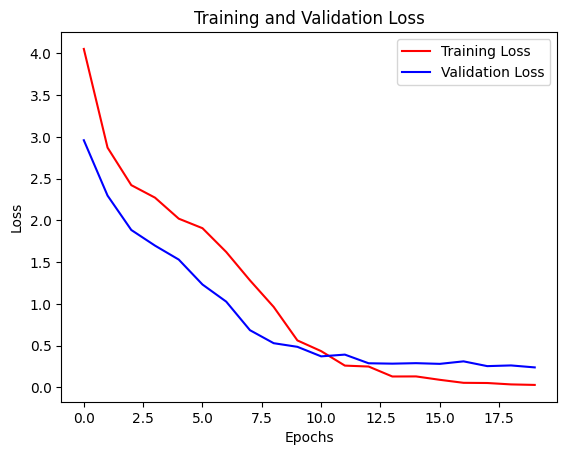

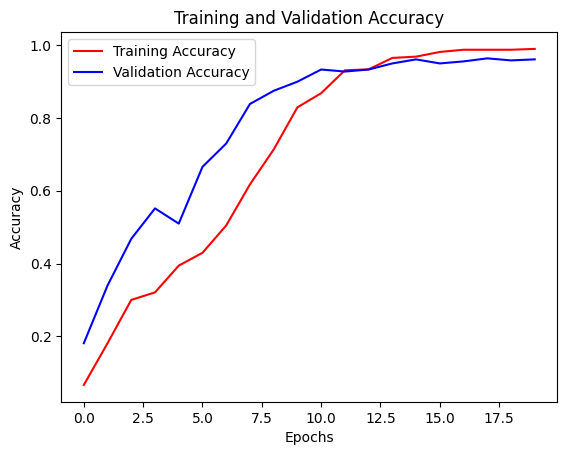

In [ ]:
from matplotlib import pyplot as plt

train_loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

train_acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')

epochs = range(len(train_loss))

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
vgg.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 15s/step - accuracy: 0.9566 - loss: 0.2887


[0.24582023918628693, 0.9601139426231384]

In [ ]:
vgg.save('vgg16_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>